In [291]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import heapq
import matplotlib.pyplot as plt
from scipy import misc

In [292]:
def PCA(X, pc, center=True):
    (n, d) = X.shape
    if(center): X = X - X.mean(axis=0).reshape(1, d) # Mean-Normalization(Data Centering)
    cov = X.T.dot(X) / (n-1) # Co-Variance Matrix
    w, E = np.linalg.eig(cov) # Eigen-Values and Eigen-Vectors
    
    # Arranging Eigen-Vectors in Decreasing Order
    complex_to_float_func = lambda x: x.astype(np.float)
    w, E = complex_to_float_func(w), complex_to_float_func(E)
    
    map_ev = {}
    for index in range(w.shape[0]): map_ev[w[index]] = E[index] 
    
    heap = heapq.nlargest(pc, w.tolist()) # Maintains k largest elements in heap
    EV = []
    for ev in heap: EV.append(map_ev[ev])

    return (heap, EV, X.dot(np.array(EV).T)) # Return Original Data casted to Reduced Dimension

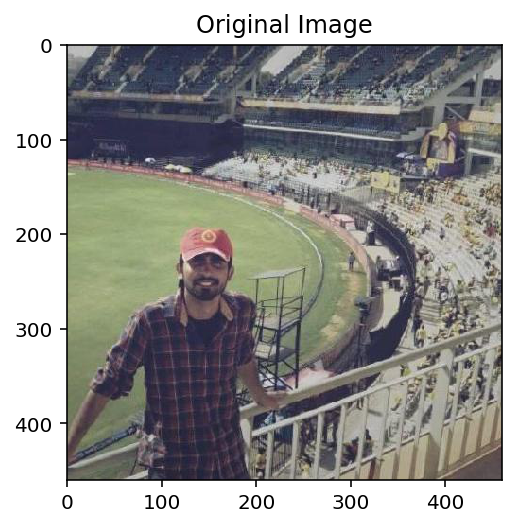

In [352]:
original_image = misc.imread("data/images/pic.jpeg")
plt.title("Original Image")
plt.imshow(original_image)
plt.show()

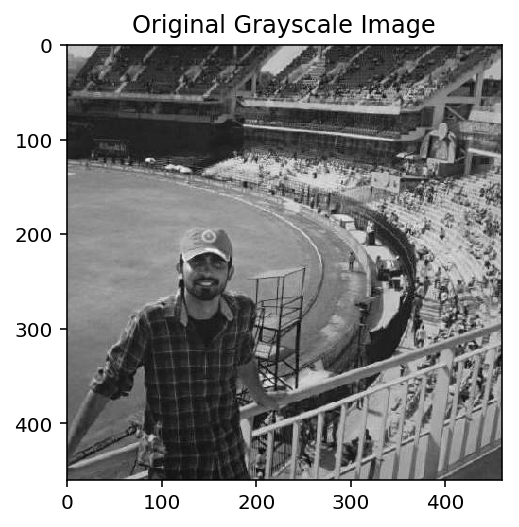

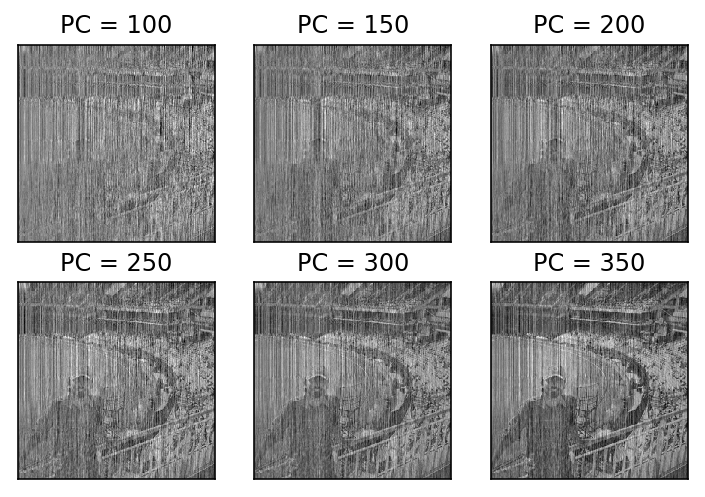

In [355]:
image_grayscale = original_image.mean(axis=2) # Mean of RGB values to convert to grayscale
title("Original Grayscale Image")
plt.imshow(image_grayscale)
plt.show()

plot_index = 1
for pc in range(100, 400, 50):
    e_values, e_vectors, reduced_image = PCA(image_grayscale, pc)
    reconstructed_image = reduced_image.dot(e_vectors)
    ax = subplot(2, 3, plot_index, frame_on=True)
    ax.set_xticks([])
    ax.set_yticks([])
    plot_index += 1
    imshow(reconstructed_image)
    title("PC = " + str(pc))

plt.show()
gray()